In [1]:
import pandas as pd
import numpy as np
import tweepy # pip install tweepy - cmd to install the package
import json

## Gathering Data

In [2]:
image_prediction=pd.read_csv('image-predictions-3.tsv', sep='\t') # theimage pred would be merged in one column which would also affect the other results 
image_prediction.head() # head, info would also get affected, hence to read tsv file used sep t

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [3]:
twitter_ae=pd.read_csv('twitter-archive-enhanced-2.csv')
twitter_ae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [5]:
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
twitter_ae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
#twitter_ae.retweeted_status_id.drop
#twitter_ae.drop(columns=[''])
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [8]:
twitter_ae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
consumer_key = '*'
consumer_secret = '*'
access_token = '*'
access_secret = '*'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [10]:
tweet_list=[]
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)

        # Append to list of dictionaries
        tweet_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                       })


In [11]:
df=pd.DataFrame(tweet_list)
df.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [12]:
df.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Making copies of the data

In [14]:
twitter_ae_copy=twitter_ae.copy(deep=False)
df_copy=df.copy(deep=False)
image_prediction_copy=image_prediction.copy(deep=False)

## Assessing and cleaning data

### Quality issue 1 -dropping retweeted column

In [15]:
#twitter_ae.retweeted_status_id.isnull
#twitter_ae.retweeted_status_user_id.isnull
#twitter_ae.retweeted_status_timestamp.isnull
twitter_ae1=twitter_ae_copy.retweeted_status_id.drop
twitter_ae1

<bound method NDFrame.drop of 0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19      8.874740e+17
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
            ...     
2326             NaN
2327             NaN
2328             NaN
2329             NaN
2330             NaN
2331             NaN
2332             NaN
2333             NaN
2334             NaN
2335             NaN
2336             NaN
2337             NaN
2338             NaN
2339             NaN
2340             NaN
2341

In [16]:
twitter_ae_copy.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Quality issue 2 -dropping remaining unused columns

In [17]:
columns_drop=[ 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id', 'expanded_urls']
#retweeted_status_id
twitter_ae2=twitter_ae_copy.drop(columns_drop,axis=1)
twitter_ae2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


### Tidiness Issue 1- Merge the tweet_data into the twitter_archive using inner join

In [18]:
# check the number of foreign key in two tables
print(twitter_ae2.tweet_id.count())
print(df_copy.tweet_id.count())


2356
2354


In [19]:
twitter_ae2 = pd.merge(twitter_ae2, df_copy, on='tweet_id', how = 'inner')
print(twitter_ae2.tweet_id.count())

2354


### Quality issue 3 -conversion of timestamp to date time format

In [20]:
twitter_ae2['timestamp']=pd.to_datetime(twitter_ae2['timestamp'])
twitter_ae2['timestamp'].head(5)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Quality issue 4-changing string to capital

In [21]:
#twitter_ae2.name.str.islower()
twitter_ae2.doggo.str.islower().sum()

97

In [22]:
#twitter_ae2.name.str.islower()
twitter_ae2['doggo']=twitter_ae2.doggo.str.capitalize()
twitter_ae2.doggo.str.islower().sum()

0

In [23]:
twitter_ae2.doggo.isna

<bound method Series.isna of 0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9       Doggo
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
        ...  
2324     None
2325     None
2326     None
2327     None
2328     None
2329     None
2330     None
2331     None
2332     None
2333     None
2334     None
2335     None
2336     None
2337     None
2338     None
2339     None
2340     None
2341     None
2342     None
2343     None
2344     None
2345     None
2346     None
2347     None
2348     None
2349     None
2350     None
2351     None
2352     None
2353     None
Name: doggo, Length: 2354, dtype: object>

In [24]:
twitter_ae2.doggo.replace(np.NaN, '', inplace=True)
#twitter_ae2['stage']=twitter_ae2.doggo.replace(np.NaN, '', inplace=True)+twitter_ae2.floofer.replace(np.NaN, '', inplace=True) + twitter_ae2.pupper.replace(np.NaN, '', inplace=True) + twitter_ae2.puppo.replace(np.NaN, '', inplace=True)


### Tidiness issue2 - merging all the dog columns to one stage column

In [25]:
twitter_ae2['stage']=twitter_ae2.doggo+twitter_ae2.floofer + twitter_ae2.pupper + twitter_ae2.puppo
# merging the data into onecolumn called stage

twitter_ae2.loc[twitter_ae2.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_ae2.loc[twitter_ae2.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_ae2.loc[twitter_ae2.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

twitter_ae2.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,39467,8853,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,33819,6514,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,25461,4328,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,42908,8964,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,41048,9774,NoneNoneNoneNone


### Quality issue 5-Correcting names of in correct dog columns

In [26]:
twitter_ae2.name.value_counts()

None           744
a               55
Charlie         12
Cooper          11
Lucy            11
Oliver          11
Penny           10
Tucker          10
Lola            10
Winston          9
Bo               9
the              8
Sadie            8
Buddy            7
an               7
Bailey           7
Toby             7
Daisy            7
Oscar            6
Leo              6
Rusty            6
Dave             6
Bella            6
Stanley          6
Milo             6
Koda             6
Scout            6
Jax              6
Jack             6
Chester          5
              ... 
Blakely          1
Robin            1
Barry            1
Ben              1
Kingsley         1
Christoper       1
Moofasa          1
old              1
Rontu            1
Kendall          1
Alexander        1
Beya             1
Horace           1
Billl            1
Dook             1
Andy             1
DayZ             1
Smiley           1
Andru            1
infuriating      1
Charl            1
Sandra      

In [27]:
wrong_list = ['a','the','an']
for i in wrong_list:
    twitter_ae2.name.replace(i, 'None', inplace=True)


In [28]:
twitter_ae2.name.value_counts()

None         814
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
Daisy          7
Buddy          7
Bailey         7
Toby           7
Dave           6
Koda           6
Oscar          6
Stanley        6
Rusty          6
Jax            6
Bella          6
Scout          6
Milo           6
Jack           6
Leo            6
Oakley         5
Finn           5
Gus            5
Alfie          5
            ... 
Raphael        1
Brandy         1
Ricky          1
Lenox          1
Maya           1
Biden          1
Champ          1
Darla          1
Trigger        1
Chef           1
such           1
Ridley         1
Finnegus       1
Blanket        1
River          1
Ole            1
Bertson        1
Kaia           1
Chaz           1
Gerbald        1
Stephanus      1
Kota           1
Willem         1
Jangle         1
Jazz           1
Clyde          1
Stewie         1
Sonny         

### Quality issue 6- Changing the names of the sources drom wheere the tweets originate

In [29]:
twitter_ae2['source'] = twitter_ae2['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iphone')
twitter_ae2['source'] =  twitter_ae2['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
twitter_ae2['source'] =  twitter_ae2['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
twitter_ae2['source'] =  twitter_ae2['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')


In [30]:
twitter_ae2.source.value_counts()

Twitter for iphone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Quality issue 7 -Renaming the image prediction  columns

In [31]:
image_prediction_copy.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog','p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog','p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

In [32]:
image_prediction_copy.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality issue 8 - Making the first letter of 1st prediction capital

In [33]:
image_prediction_copy['first_prediction']=image_prediction_copy.first_prediction.str.capitalize()

In [34]:
image_prediction_copy.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Visualization

Text(0.5,1,'Distribution of Source')

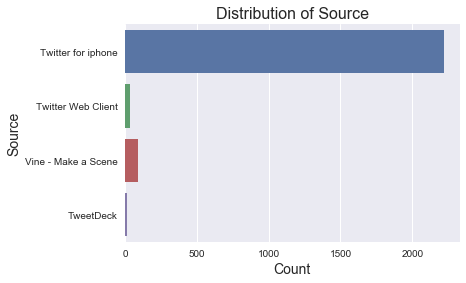

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="darkgrid")
sns.countplot(data = twitter_ae2, y = 'source')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('Distribution of Source',fontsize=16)


From the above visualization, it is seen that the maximum tweets came from twitter tweeted from iPhones(twitter application), rather than people using the website twitter(web link).

Plus this plot also shows us that TweetDeck is used by extremely few people to tweet about the dog ratings!!